In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-12.974143172742188 20.65160595269313
-5.655966711023964 127.48841496208394
-69.40398345807453 -38.11966226370524
43.413780921796416 -101.53425013578567
13.355074866137414 38.55800374950414
85.86865623255053 30.00794525375781
-27.49565253263124 176.3176555490565
-88.25772432241757 78.90429888126977
87.58890450954894 -128.71163434263798
34.71878951002448 134.75042218178544
-21.7287806234811 -101.00017205319645
2.1583057945965294 136.5233298656509
63.418888247439355 -15.613292487245019
-24.907763453979953 156.55160168223455
-88.80756991398411 34.821230263536535
85.12711470643993 79.88999315564257
-60.53912188661138 -89.14118303132734
38.6501604431495 -145.11466750408556
75.76469077664504 179.19417896896084
62.19477003487057 4.270345100844565
-65.20347108835651 64.2558531296063
53.95569987089078 152.3831127836005
78.88168518988459 -43.643508481249256
74.09573442214295 31.481795213473845
17.004452167783427 105.34394700227006
-25.587879151151938 87.1397027145315
-81.28296684545012 -108.9787

36.620087265803704 -27.924998780813468
60.26137053664439 161.734116794633
46.623501629610445 -69.47181173369103
-26.2717420383373 -44.662896818237385
59.97429844549217 90.51261515559906
-30.103179841351718 23.997478019128494
-0.9712182347093972 -118.84423529973749
-81.15936870729375 -126.33630031960894
-51.31331902400874 -115.90804923845381
-13.818866076208948 -36.83794610505143
48.64663923181888 -1.7365032481281162
31.962536036866055 88.2332035476523
33.71292951450485 83.83901373720079
-30.564796813735867 105.0890613118653
-8.419377070353804 -151.19896526186295
65.57309515138735 -171.1712286471883
65.78763983784307 -96.97097249045558
-32.960997951924 -95.52808262211931
-35.550710684229905 127.8714584177568
14.899037298044036 -75.43836106940054
52.65706234902623 57.68723652471007
11.683127183125976 -99.37117526933201
-26.798844879748643 43.14065625405675
-36.137210898060246 -41.226874084411435
66.41545630658143 -108.79489096121347
14.611265640349586 -128.2126762450554
8.994432091637364

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
import requests
requests.__version__

'2.27.1'

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [29]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retreival      ")
print("                              ")

# Create Counters.
record_count = 1
set_count = 1

Beginning Data Retreival      
                              


In [11]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for loggin purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endponit URL with each city.
    city_url = url + '&q=' + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | leua
Processing Record 2 of Set 1 | ambon
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | pierre
Processing Record 5 of Set 1 | abiy adi
City not found. Skipping...
Processing Record 6 of Set 1 | mehamn
Processing Record 7 of Set 1 | kaeo
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | himeji
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | biak
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | hervey bay
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | maloy
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | sobolevo
Processing Record 23 of Set 1 | ilulissat
Processing Recor

Processing Record 40 of Set 4 | staraya kulatka
Processing Record 41 of Set 4 | bongor
Processing Record 42 of Set 4 | nanhai
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | cape town
Processing Record 45 of Set 4 | topeka
Processing Record 46 of Set 4 | pevek
Processing Record 47 of Set 4 | beloha
Processing Record 48 of Set 4 | jacareacanga
Processing Record 49 of Set 4 | bagotville
Processing Record 50 of Set 4 | san antonio
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | egvekinot
Processing Record 3 of Set 5 | manitouwadge
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | jadu
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | huoqiu
Processing Record 8 of Set 5 | tromso
Processing Record 9 of Set 5 | guajara
Processing Record 10 of Set 5 | rangapara
Processing Record 11 of Set 5 | pangnirtung
Processing Record 12 of Set 5 | tulua
Processing Record 13 of Set 5 | hithadhoo
Processing Record 1

Processing Record 27 of Set 8 | nioro
Processing Record 28 of Set 8 | tautira
Processing Record 29 of Set 8 | jamnagar
Processing Record 30 of Set 8 | mantua
Processing Record 31 of Set 8 | kamenka
Processing Record 32 of Set 8 | severo-kurilsk
Processing Record 33 of Set 8 | oranjestad
Processing Record 34 of Set 8 | melnikovo
Processing Record 35 of Set 8 | fortuna
Processing Record 36 of Set 8 | ulaangom
Processing Record 37 of Set 8 | carutapera
Processing Record 38 of Set 8 | solsvik
City not found. Skipping...
Processing Record 39 of Set 8 | baykit
Processing Record 40 of Set 8 | sangar
Processing Record 41 of Set 8 | atar
Processing Record 42 of Set 8 | bath
Processing Record 43 of Set 8 | paamiut
Processing Record 44 of Set 8 | kyzyl-suu
Processing Record 45 of Set 8 | abu samrah
Processing Record 46 of Set 8 | boa vista
Processing Record 47 of Set 8 | viedma
Processing Record 48 of Set 8 | shubarshi
Processing Record 49 of Set 8 | vestmannaeyjar
Processing Record 50 of Set 8 |

Processing Record 15 of Set 12 | honiara
Processing Record 16 of Set 12 | tomohon
Processing Record 17 of Set 12 | dabat
Processing Record 18 of Set 12 | beroroha
Processing Record 19 of Set 12 | elko
Processing Record 20 of Set 12 | beira
Processing Record 21 of Set 12 | moindou
Processing Record 22 of Set 12 | tyup
Processing Record 23 of Set 12 | zabaykalsk
Processing Record 24 of Set 12 | soe
Processing Record 25 of Set 12 | kununurra
Processing Record 26 of Set 12 | bilibino
Processing Record 27 of Set 12 | energetik
Processing Record 28 of Set 12 | kalmunai
Processing Record 29 of Set 12 | venado tuerto
Processing Record 30 of Set 12 | turayf
Processing Record 31 of Set 12 | tecoanapa
Processing Record 32 of Set 12 | ituni
City not found. Skipping...
Processing Record 33 of Set 12 | caibarien
Processing Record 34 of Set 12 | valparaiso
Processing Record 35 of Set 12 | kidodi
Processing Record 36 of Set 12 | shache
Processing Record 37 of Set 12 | savinskiy
Processing Record 38 of

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leua,SK,2022-03-08 17:54:30,48.2156,18.6071,41.34,60,34,7.43
1,Ambon,ID,2022-03-08 17:54:30,-3.6954,128.1814,77.14,94,40,3.44
2,Ushuaia,AR,2022-03-08 17:50:20,-54.8000,-68.3000,56.86,54,75,19.57
3,Pierre,US,2022-03-08 17:54:31,44.3683,-100.3510,37.06,55,100,11.99
4,Mehamn,NO,2022-03-08 17:54:32,71.0357,27.8492,33.71,79,97,21.47
5,Kaeo,NZ,2022-03-08 17:54:32,-35.1000,173.7833,67.17,73,100,8.28
6,Busselton,AU,2022-03-08 17:54:32,-33.6500,115.3333,67.05,61,59,13.04
7,Tuktoyaktuk,CA,2022-03-08 17:54:33,69.4541,-133.0374,-9.40,84,100,2.30
8,Himeji,JP,2022-03-08 17:54:33,34.8167,134.7000,43.61,58,14,4.92
9,Puerto Ayora,EC,2022-03-08 17:54:34,-0.7393,-90.3518,84.16,95,45,1.01


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

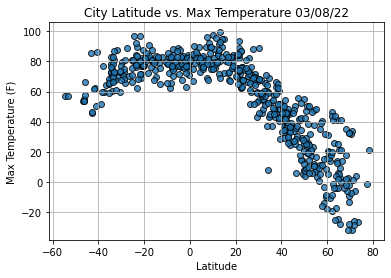

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

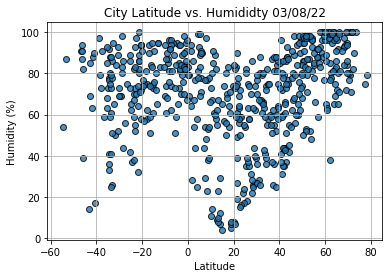

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humididty "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

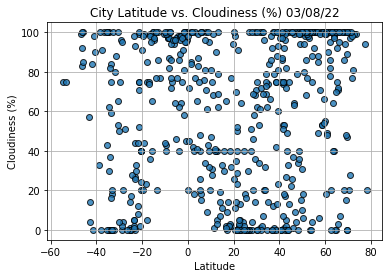

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

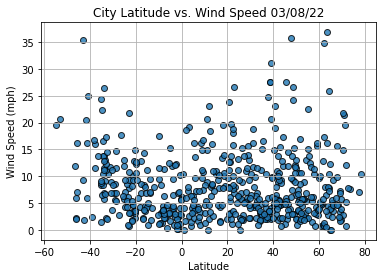

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()